In [1]:
import torch
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

In [2]:
def perform_clustering(keys, num_clusters=5):
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=0).fit(keys)

    pca = PCA(n_components=2)
    reduced_keys = pca.fit_transform(keys)

    score1 = silhouette_score(keys, kmeans.labels_)
    score2 = calinski_harabasz_score(keys, kmeans.labels_)
    score3 = davies_bouldin_score(keys, kmeans.labels_)
    # print(f"{score1}\t{score2}\t{score3}")
    scores = [score1, score2, score3]

    return (kmeans.labels_, reduced_keys, scores)

In [3]:
def draw_k_cluster(kmeans_labels_all, reduced_keys_all, num_clusters=5, use_xylabel=True):
    fig, axs = plt.subplots(3, 4, figsize=(20, 16))
    plt.suptitle(f'K-Means Clustering of Keys')
    
    for i, (kmeans_labels, reduced_keys) in enumerate(zip(kmeans_labels_all, reduced_keys_all)):
        plt.subplot(3, 4, i+1)
        for j in range(num_clusters):
            points = reduced_keys[kmeans_labels == j]
            if use_xylabel:
                plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {j+1}')
            else:
                plt.scatter(points[:, 0], points[:, 1])
        plt.title(f'Layer {i+1}')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.legend()
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # rect 参数用于调整标题的位置
    plt.show()

In [4]:
def draw_scores(scores_all):
    scores_all = np.array(scores_all)
    x = list(range(1, len(scores_all) + 1))

    fig, axs = plt.subplots(3, 1, figsize=(10, 12))
    plt.suptitle(f'Scores of K-Means Clustering of Keys')

    plt.subplot(3, 1, 1)
    y = scores_all[:, 0].tolist()
    plt.title('Silhouette Score (near to 1 is better)')
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    plt.xlabel('Layers')
    plt.ylabel('Silhouette Score')
    plt.legend()

    plt.subplot(3, 1, 2)
    y = scores_all[:, 1].tolist()
    plt.title('Calinski-Harabasz Index (bigger is better)')
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    plt.xlabel('Layers')
    plt.ylabel('Calinski-Harabasz Index')
    plt.legend()

    plt.subplot(3, 1, 3)
    y = scores_all[:, 2].tolist()
    plt.title('Davies-Bouldin Index (smaller is better)')
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    plt.xlabel('Layers')
    plt.ylabel('Davies-Bouldin Index')
    plt.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # rect 参数用于调整标题的位置
    plt.show()
        

Loaded KV Cache from 'kv_cache.pt'
layers:12, k_shape:torch.Size([1, 12, 345, 64])


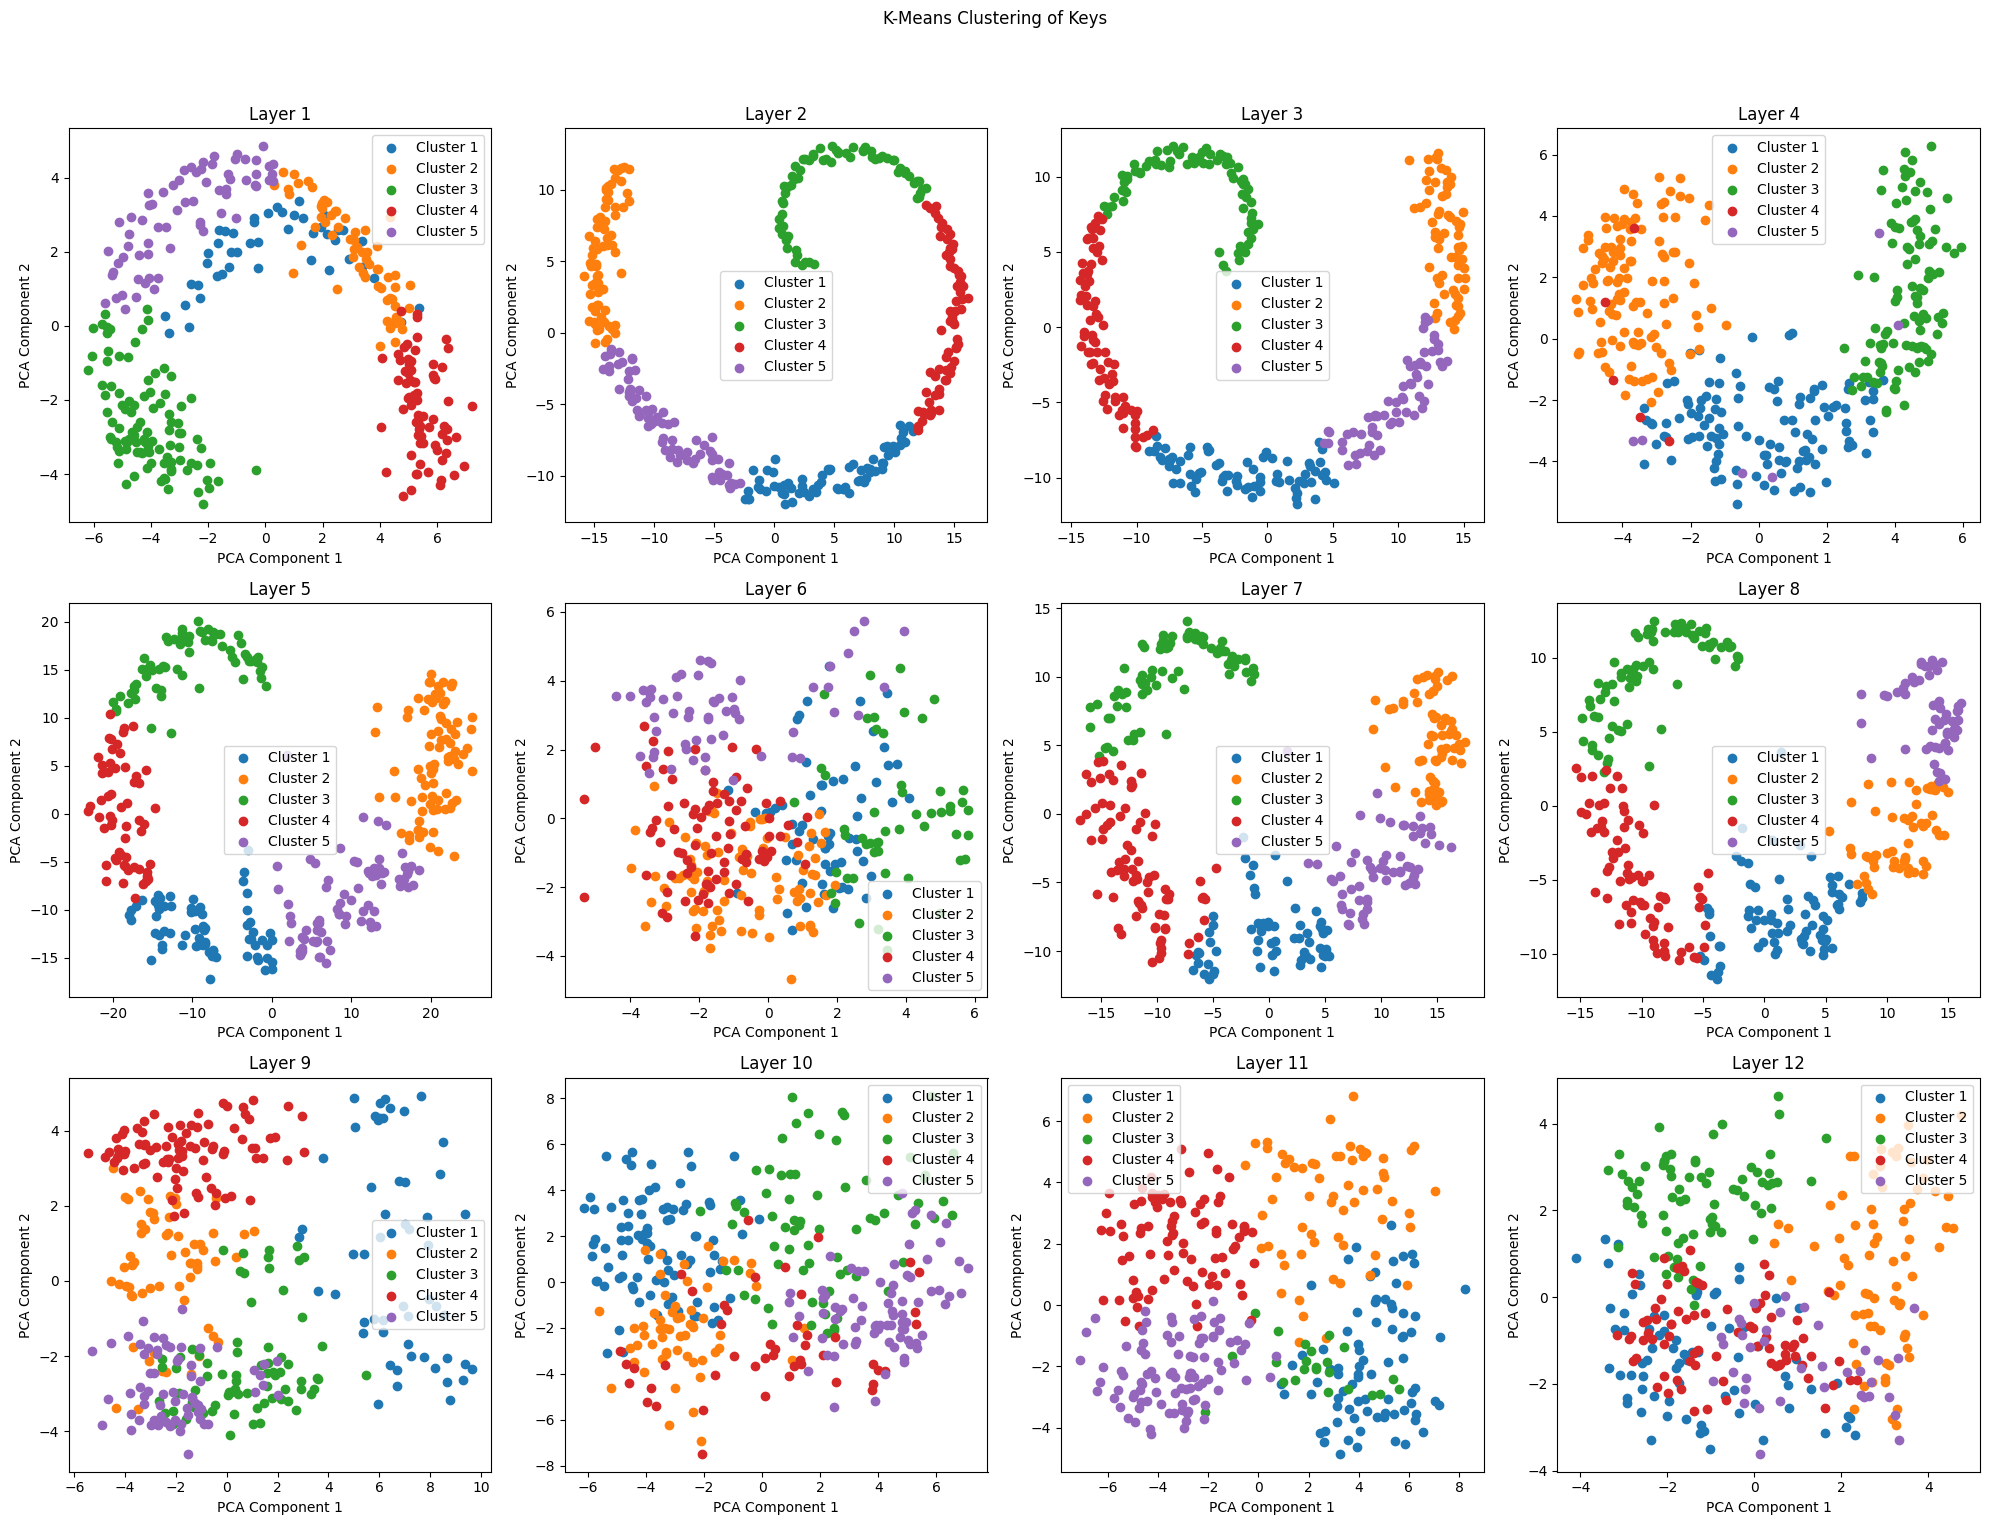

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


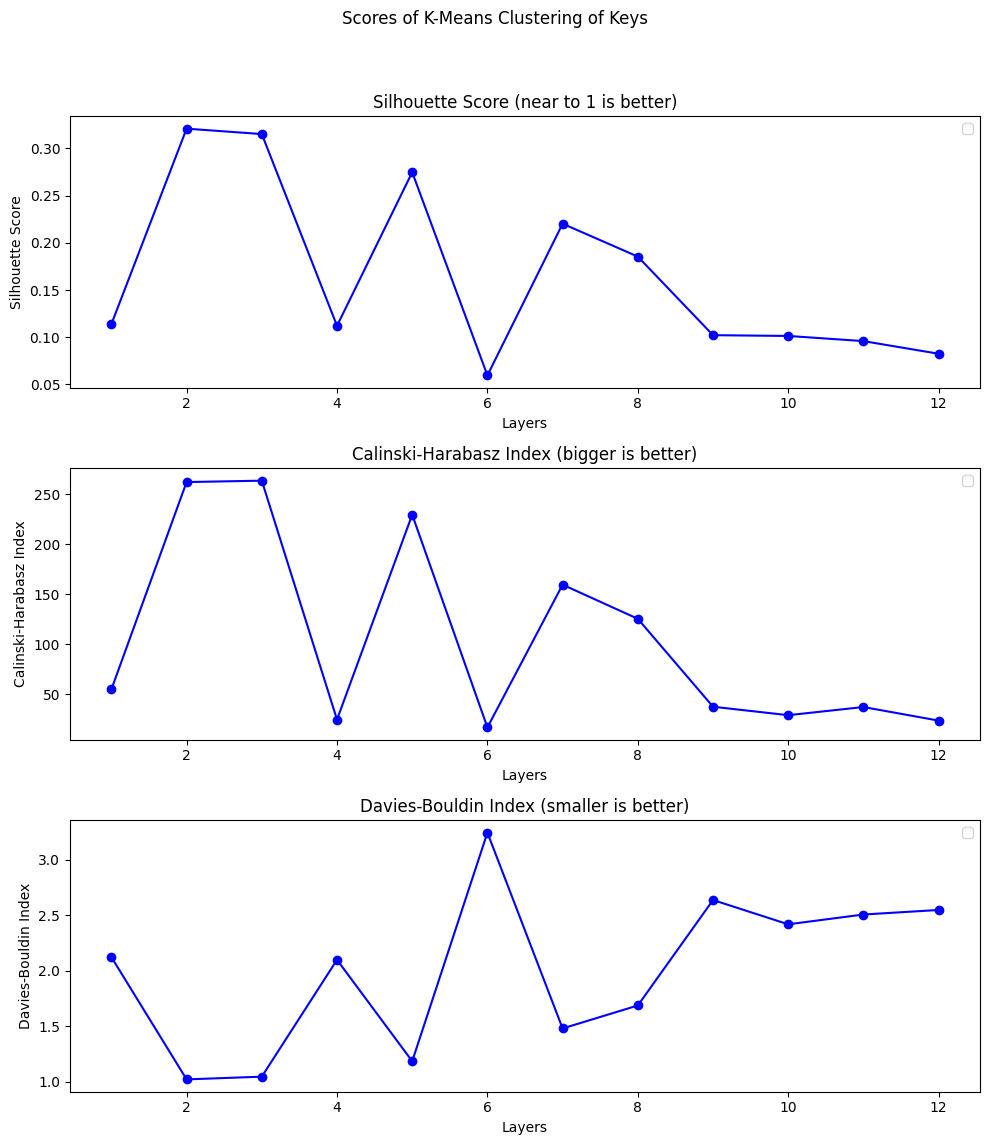

In [5]:
loaded_past_key_values = torch.load('kv_cache.pt')
print("Loaded KV Cache from 'kv_cache.pt'")
print(f"layers:{len(loaded_past_key_values)}, k_shape:{loaded_past_key_values[0][0].shape}")

kmeans_labels_all, reduced_keys_all, scores_all = [], [], []

for i, k_v in enumerate(loaded_past_key_values):
    k, v = k_v[0], k_v[1]

    # The first batch's and the first head's keys of each layer.
    keys = k[0][0].squeeze().numpy()
    kmeans_labels, reduced_keys, scores = perform_clustering(keys)

    kmeans_labels_all.append(kmeans_labels)
    reduced_keys_all.append(reduced_keys)
    scores_all.append(scores)

draw_k_cluster(kmeans_labels_all, reduced_keys_all)
draw_scores(scores_all)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

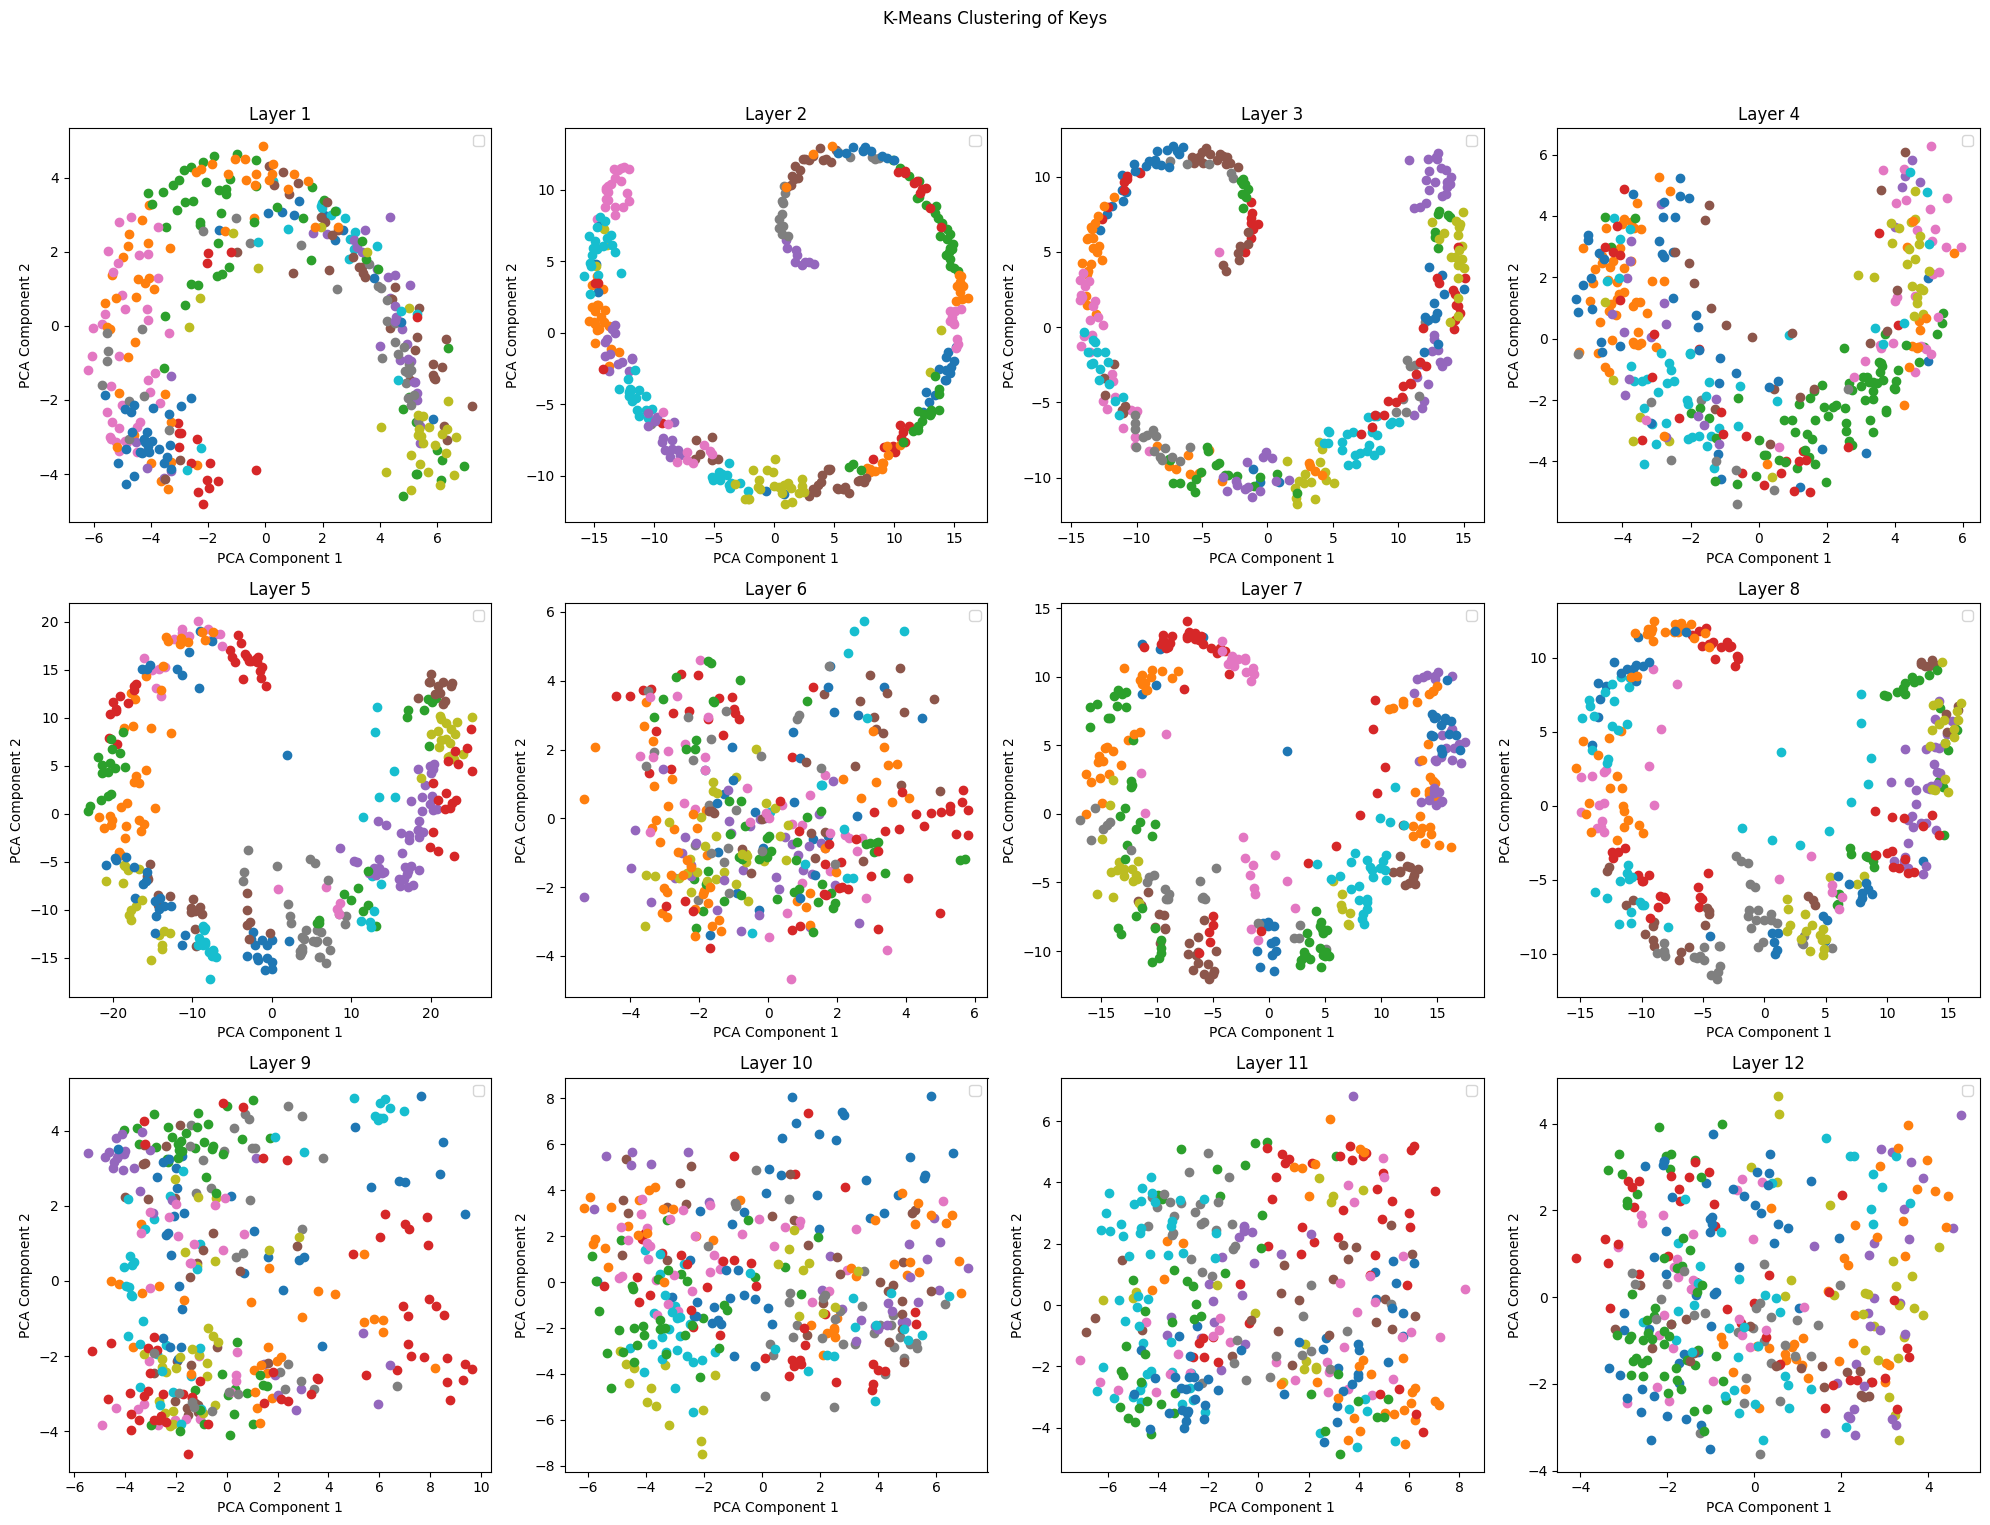

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


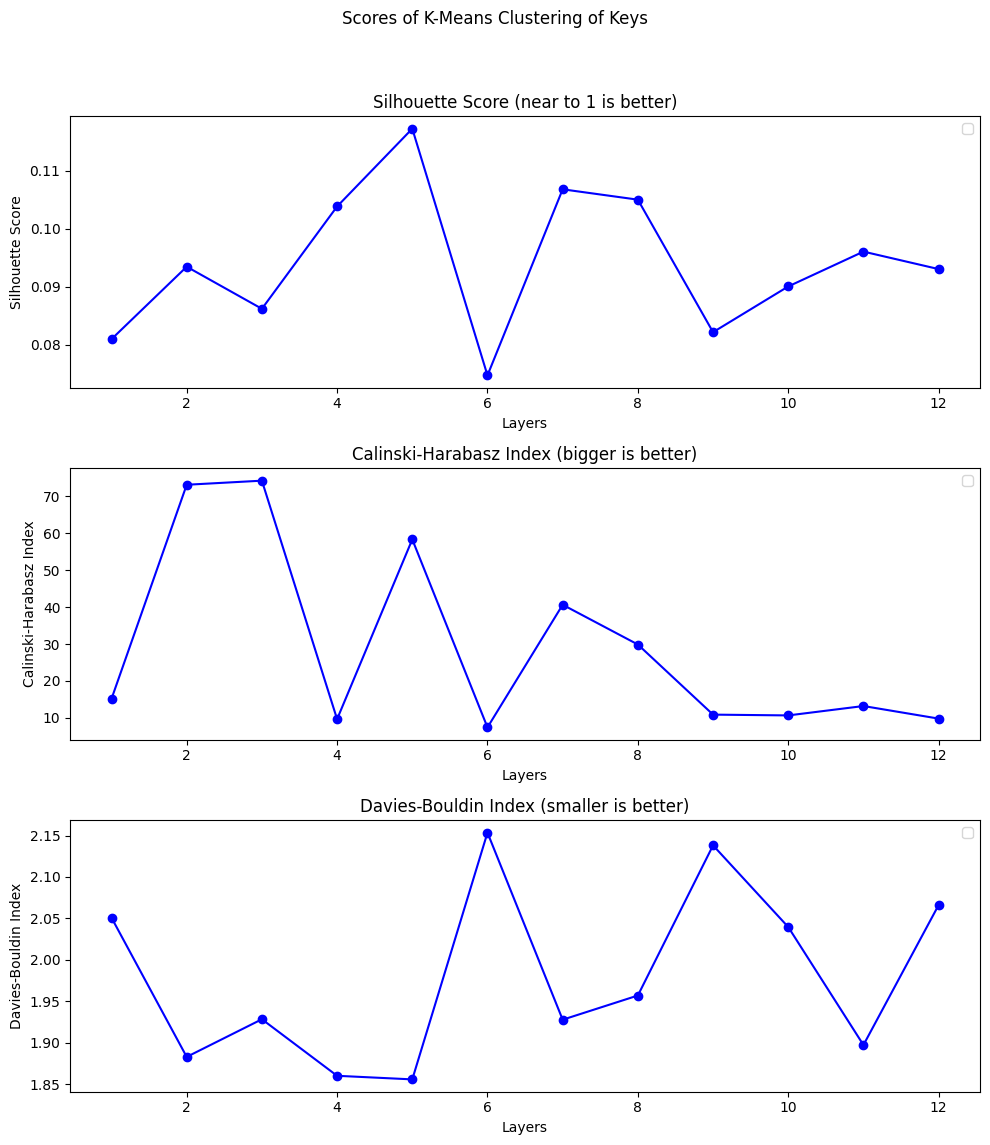

In [6]:
kmeans_labels_all, reduced_keys_all, scores_all = [], [], []

for i, k_v in enumerate(loaded_past_key_values):
    k, v = k_v[0], k_v[1]
    keys = k[0][0].squeeze().numpy()
    num_clusters = int(len(keys) * 0.1)
    kmeans_labels, reduced_keys, scores = perform_clustering(keys, num_clusters=num_clusters)

    kmeans_labels_all.append(kmeans_labels)
    reduced_keys_all.append(reduced_keys)
    scores_all.append(scores)

draw_k_cluster(kmeans_labels_all, reduced_keys_all, num_clusters=num_clusters, use_xylabel=False)
draw_scores(scores_all)